<a href="https://colab.research.google.com/github/stevencsw/StockPricePrediction/blob/master/Colab's_New_Code_Editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description : This program uses an artificial recurrent neural network called LSTM


In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [4]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-30')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093
...,...,...,...,...,...,...
2019-12-23,284.250000,280.369995,280.529999,284.000000,24643000.0,284.000000
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,284.269989
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.910004


In [5]:
#Get the number of rows and columns in the data set
df.shape

(2011, 6)

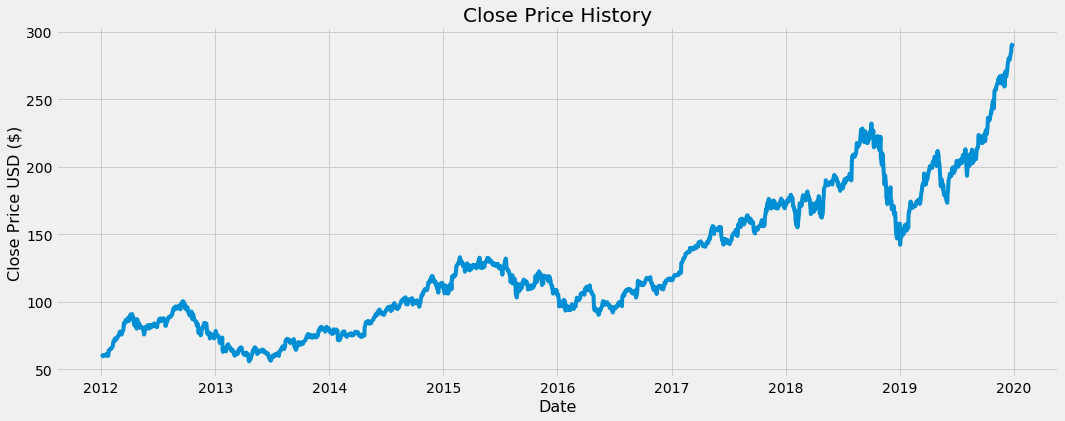

In [9]:
#Visualize the closing price history
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show()

In [10]:
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .75 )

training_data_len 

1509

In [11]:
#Scale the dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01254461],
       [0.01388393],
       [0.01666555],
       ...,
       [0.99317021],
       [0.99270351],
       [1.        ]])

In [16]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.01254461, 0.01388393, 0.01666555, 0.01931386, 0.01890783,
       0.01982291, 0.01940476, 0.01870178, 0.01774427, 0.02070771,
       0.02338026, 0.02255607, 0.01804122, 0.02235002, 0.01810788,
       0.03401591, 0.03278568, 0.03439165, 0.03786414, 0.03996702,
       0.03979128, 0.03914284, 0.0419063 , 0.04450611, 0.04745139,
       0.05220865, 0.06220192, 0.06235342, 0.0679167 , 0.07207398,
       0.06492899, 0.06768034, 0.0676258 , 0.07534044, 0.07424353,
       0.07627369, 0.07992193, 0.08195212, 0.08780021, 0.09206055,
       0.09329074, 0.09372103, 0.08643668, 0.0846792 , 0.0849398 ,
       0.09178781, 0.09371498, 0.09785407, 0.10761101, 0.12062833,
       0.11819212, 0.11819817, 0.12760968, 0.13055493, 0.1284581 ,
       0.12654309, 0.12454928, 0.13117306, 0.13571824, 0.13762114])]
[0.1329184100733258]



In [0]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1449, 60, 1)

In [23]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:
#Train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1449/1449 [==============================] - 114s 79ms/step - loss: 6.2965e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [0]:
#Convert the data into numpy array
x_test = np.array(x_test)
#y_test = np.array(y_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))



In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Automatic Completions

Code completions and documentation hints occur automatically while you type.

Use the following keyboard shortcuts:
 - `Ctrl-space` to re-open completions.
 - `Ctrl-shift-space` to re-open parameter hints.

![Rich completions](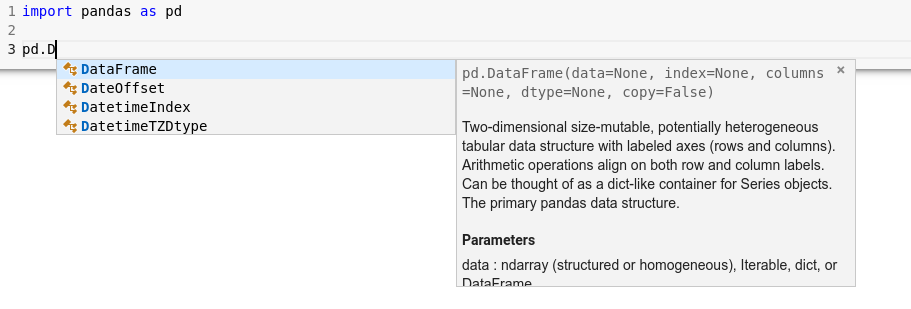
)




## Disabling automatic completions

Automatic completions can be disabled in Settings with the "Automatically trigger code completions" option.

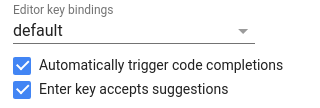

# Keyboard Bindings

The default editor keyboard bindings have been updated and there are now additional options for keybindings including:

* Vim
* Classic - restores some common keyboard shortcuts from the previous editor.

These options are available in Settings with the "Editor key bindings" option.

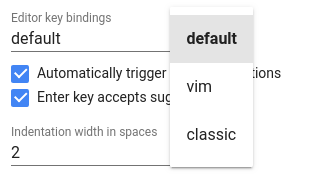

With automatic completions disabled use:
 - `Tab` to re-open completions.
 - `Shift-tab` to re-open parameter hints.

# Richer syntax highlighting

Improved support for nested languages:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```